In [1]:
import os
import clustering
import alignment
import fake_alignment
import cluster_visualization
import template_generating
import stat_calculator

%matplotlib inline

In [24]:
from importlib import reload

In [25]:
fake_alignment = reload(fake_alignment)

In [2]:
from _cluster_file_functions import extract_clusters, record_clusters

In [3]:
SEQUENCE_SOURCE_DIR = 'data_chronic_patients/'  # Folder with sequences
SEQUENCE_SOURCE_NAME = 'chains_exp1_2_1'  # Name of sequences file without extention
OUT_DIR_CLUSTERS = 'data_chronic_patients/Clusters/'  # Folder for clusters
OUT_DIR_VISUALIZATION = 'data_chronic_patients/Paths'  # Folder with graphs
# OUTCOMES_FILE = 'data1/Outcomes.csv'
OUTCOMES_FILE = None
NODE_PARAMETERS_DIR = '_nodes_parameters/chronic_patients'  # File with settings (names_dict.txt is required!!!)
SEQUENCE_SEPARATOR = '\t'  # A separator in SEQUENCE_SOURCE_NAME
encoding = 'cp1251'

In [4]:
# read sequences
sequence_source_path = os.path.join(SEQUENCE_SOURCE_DIR, SEQUENCE_SOURCE_NAME + '.txt')
vectors, cases = extract_clusters(sequence_source_path, eval_=False, header=True,
                                      encoding=encoding, sep=SEQUENCE_SEPARATOR)
vectors = vectors[0]
cases = cases[0]
print(len(vectors), 'sequences')

2112 sequences


In [5]:
OUT_DIR_CLUSTERS += SEQUENCE_SOURCE_NAME + '/'

#### Distance matrix

In [8]:
# filename of distance matrix 
distance_matrix_file = '{0}{1}_similarity_matrix.txt'.format(OUT_DIR_CLUSTERS,
                                                                 SEQUENCE_SOURCE_NAME)

lev_sim_matrix = clustering.get_similarity_matrix(distance_matrix_file, vectors)

0 lines in matrix calculated
1 lines in matrix calculated
2 lines in matrix calculated
3 lines in matrix calculated
4 lines in matrix calculated
5 lines in matrix calculated
6 lines in matrix calculated
7 lines in matrix calculated
8 lines in matrix calculated
9 lines in matrix calculated
10 lines in matrix calculated
11 lines in matrix calculated
12 lines in matrix calculated
13 lines in matrix calculated
14 lines in matrix calculated
15 lines in matrix calculated
16 lines in matrix calculated
17 lines in matrix calculated
18 lines in matrix calculated
19 lines in matrix calculated
20 lines in matrix calculated
21 lines in matrix calculated
22 lines in matrix calculated
23 lines in matrix calculated
24 lines in matrix calculated
25 lines in matrix calculated
26 lines in matrix calculated
27 lines in matrix calculated
28 lines in matrix calculated
29 lines in matrix calculated
30 lines in matrix calculated
31 lines in matrix calculated
32 lines in matrix calculated
33 lines in matrix c

468 lines in matrix calculated
469 lines in matrix calculated
470 lines in matrix calculated
471 lines in matrix calculated
472 lines in matrix calculated
473 lines in matrix calculated
474 lines in matrix calculated
475 lines in matrix calculated
476 lines in matrix calculated
477 lines in matrix calculated
478 lines in matrix calculated
479 lines in matrix calculated
480 lines in matrix calculated
481 lines in matrix calculated
482 lines in matrix calculated
483 lines in matrix calculated
484 lines in matrix calculated
485 lines in matrix calculated
486 lines in matrix calculated
487 lines in matrix calculated
488 lines in matrix calculated
489 lines in matrix calculated
490 lines in matrix calculated
491 lines in matrix calculated
492 lines in matrix calculated
493 lines in matrix calculated
494 lines in matrix calculated
495 lines in matrix calculated
496 lines in matrix calculated
497 lines in matrix calculated
498 lines in matrix calculated
499 lines in matrix calculated
500 line

1088 lines in matrix calculated
1089 lines in matrix calculated
1090 lines in matrix calculated
1091 lines in matrix calculated
1092 lines in matrix calculated
1093 lines in matrix calculated
1094 lines in matrix calculated
1095 lines in matrix calculated
1096 lines in matrix calculated
1097 lines in matrix calculated
1098 lines in matrix calculated
1099 lines in matrix calculated
1100 lines in matrix calculated
1101 lines in matrix calculated
1102 lines in matrix calculated
1103 lines in matrix calculated
1104 lines in matrix calculated
1105 lines in matrix calculated
1106 lines in matrix calculated
1107 lines in matrix calculated
1108 lines in matrix calculated
1109 lines in matrix calculated
1110 lines in matrix calculated
1111 lines in matrix calculated
1112 lines in matrix calculated
1113 lines in matrix calculated
1114 lines in matrix calculated
1115 lines in matrix calculated
1116 lines in matrix calculated
1117 lines in matrix calculated
1118 lines in matrix calculated
1119 lin

1569 lines in matrix calculated
1570 lines in matrix calculated
1571 lines in matrix calculated
1572 lines in matrix calculated
1573 lines in matrix calculated
1574 lines in matrix calculated
1575 lines in matrix calculated
1576 lines in matrix calculated
1577 lines in matrix calculated
1578 lines in matrix calculated
1579 lines in matrix calculated
1580 lines in matrix calculated
1581 lines in matrix calculated
1582 lines in matrix calculated
1583 lines in matrix calculated
1584 lines in matrix calculated
1585 lines in matrix calculated
1586 lines in matrix calculated
1587 lines in matrix calculated
1588 lines in matrix calculated
1589 lines in matrix calculated
1590 lines in matrix calculated
1591 lines in matrix calculated
1592 lines in matrix calculated
1593 lines in matrix calculated
1594 lines in matrix calculated
1595 lines in matrix calculated
1596 lines in matrix calculated
1597 lines in matrix calculated
1598 lines in matrix calculated
1599 lines in matrix calculated
1600 lin

In [11]:
MIN_NUM_CLUSTER = 3
MAX_NUM_CLUSTER = 10

3 clusters now
4 clusters now
5 clusters now
6 clusters now
7 clusters now
8 clusters now
9 clusters now
10 clusters now


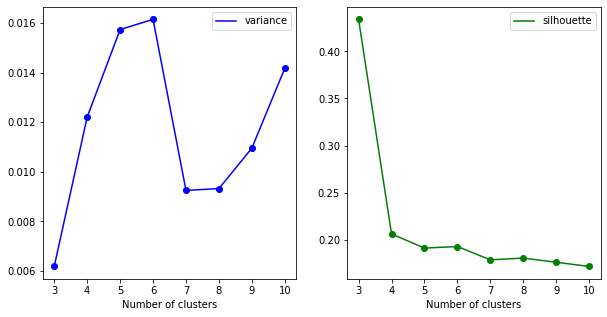

<Figure size 432x288 with 0 Axes>

In [12]:
var_metric, sill_metric = clustering.cluster_in_range(MIN_NUM_CLUSTER, 
                                   MAX_NUM_CLUSTER, 
                                   lev_sim_matrix, 
                                   vectors, 
                                   cases, 
                                   OUT_DIR_CLUSTERS)

clustering.visualize_cluster_metrics(MIN_NUM_CLUSTER, 
                                     OUT_DIR_CLUSTERS, 
                                     [var_metric, sill_metric], 
                                     ['variance', 'silhouette'])


In [49]:
# Choose a number of clusters using metrics above
num_of_clusters = 10

In [50]:
cluster_source = '{}KMeans{}.txt'.format(OUT_DIR_CLUSTERS, num_of_clusters)
clusters, cluster_cases = extract_clusters(cluster_source, eval_=False, sep='\t')

#### Fake aligment

In [55]:
file_alignment = cluster_source.split('.')[0] + '_fake_alignment.txt'
aligned_clusters = [[] for i in range(len(clusters))]
for i, cluster in enumerate(clusters):
    for sequence in cluster:
        aligned_clusters[i].append(fake_alignment.fake_alignment(sequence))

record_clusters(file_alignment, aligned_clusters, cluster_cases, sep='\t')

fake_graphs_append = []
for i, cluster in enumerate(aligned_clusters):
    graph = cluster_visualization.Graph(cluster, 
                                        cluster_cases[i],
                                        cluster_visualization.get_file_name(file_alignment), 
                                        i, 
                                        2,
                                        NODE_PARAMETERS_DIR, 
                                        OUTCOMES_FILE)
    graph.collect_edges()
    fake_graphs_append.append(graph.to_gv(OUT_DIR_VISUALIZATION, 0.00, 0.3))

#### Clusters review

In [56]:
import ipywidgets as widgets
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual

In [57]:
def show_chains_with_clusters(path_with_graphs):
    
    def display_chain(x, width):
        return Image(os.path.join(path_with_graphs, x), width = width, height = 300)
    
    png_graphs = [f for f in os.listdir(path_with_graphs) if f[-3:] == 'png']
    

    x_widget =  widgets.Dropdown(
        options=png_graphs,
        value=png_graphs[0],
        description='Кластер №',
        disabled=False,
    )



    width_slider = widgets.IntSlider(min=100, 
                                     max=1000, 
                                     step=1, 
                                     value=700,
                                    description='Размер:')

    
    interact(display_chain,
             x=x_widget,
             width=width_slider,
            );

In [58]:
path_with_fake_graphs = os.path.split(fake_graphs_append[0])[0]
show_chains_with_clusters(path_with_fake_graphs)

interactive(children=(Dropdown(description='Кластер №', options=('Cluster_0.gv.png', 'Cluster_1.gv.png', 'Clus…

### Statistics 

In [47]:
import pandas as pd
from stat_calculator import cluster_report

In [59]:
cluster_report(cluster_source, file_alignment)

,size,outliers,outliers_%,mean_seq_len
cluster,,,,
0,257,0,0.0,5.01
1,249,0,0.0,7.01
2,120,0,0.0,11.40
3,237,0,0.0,5.00
4,244,0,0.0,5.00
5,300,0,0.0,5.00
6,210,0,0.0,7.00
7,272,0,0.0,5.00
8,45,0,0.0,14.96
